In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import numpy as np
import pandas as pd

In [2]:
#!wget --no-check-certificate \
#    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
#    -O /tmp/songdata.csv

In [12]:
def tokenize_corpus(corpus,num_words=-1):
    if num_words>-1:
        tokenizer = Tokenizer(num_words=num_words)
    else:
        tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer

In [13]:
def create_lyrics_corpus(dataset,field):
    dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation),'')
    dataset[field] = dataset[field].str.lower()
    lyrics = dataset[field].str.cat()
    corpus = lyrics.split('\n')
    for l in range(len(corpus)):
        corpus[l] = corpus[l].rstrip()
    corpus = [l for l in corpus if l != '']
    return corpus

In [14]:
dataset = pd.read_csv('songdata.csv',dtype=str)[:10]

In [15]:
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [16]:
corpus = create_lyrics_corpus(dataset,'text')

In [17]:
corpus

['look at her face its a wonderful face',
 'and it means something special to me',
 'look at the way that she smiles when she sees me',
 'how lucky can one fellow be',
 'shes just my kind of girl she makes me feel fine',
 'who could ever believe that she could be mine',
 'shes just my kind of girl without her im blue',
 'and if she ever leaves me what could i do what could i do',
 'and when we go for a walk in the park',
 'and she holds me and squeezes my hand',
 'well go on walking for hours and talking',
 'about all the things that we plan',
 'shes just my kind of girl she makes me feel fine',
 'who could ever believe that she could be mine',
 'shes just my kind of girl without her im blue',
 'and if she ever leaves me what could i do what could i do',
 'take it easy with me please',
 'touch me gently like a summer evening breeze',
 'take your time make it slow',
 'andante andante',
 'just let the feeling grow',
 'make your fingers soft and light',
 'let your body be the velvet of th

In [18]:
len(corpus)

341

In [19]:
tokenizer = tokenize_corpus(corpus)
total_words = len(tokenizer.word_index)+1

In [20]:
print(total_words)

495


In [21]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

In [22]:
max_sequence_len = max([len(seq) for seq in sequences])
max_sequence_len

20

In [23]:
sequences = np.array(pad_sequences(sequences,maxlen=max_sequence_len,padding='pre'))
input_sequences, labels = sequences[:,:-1],sequences[:,-1]

In [24]:
one_hot_labels = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [25]:
print(tokenizer.word_index['know'])

32


In [26]:
print(tokenizer.word_index['feeling'])

97


In [27]:
print(input_sequences[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29
   4]


In [28]:
print(input_sequences[6])

[  0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29   4
 287]


In [29]:
print(one_hot_labels[5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [30]:

print(one_hot_labels[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional

In [34]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(input_sequences,one_hot_labels,epochs=200)

Epoch 1/200
62/62 [==============================] - 8s 12ms/step - loss: 5.9877 - accuracy: 0.0363
Epoch 2/200
62/62 [==============================] - 0s 6ms/step - loss: 5.4384 - accuracy: 0.0399
Epoch 3/200
62/62 [==============================] - 1s 8ms/step - loss: 5.3706 - accuracy: 0.0399
Epoch 4/200
62/62 [==============================] - 0s 6ms/step - loss: 5.3211 - accuracy: 0.0399
Epoch 5/200
62/62 [==============================] - 0s 6ms/step - loss: 5.2515 - accuracy: 0.0328
Epoch 6/200
62/62 [==============================] - 0s 7ms/step - loss: 5.1801 - accuracy: 0.0424
Epoch 7/200
62/62 [==============================] - 0s 7ms/step - loss: 5.1170 - accuracy: 0.0434
Epoch 8/200
62/62 [==============================] - 0s 7ms/step - loss: 5.0523 - accuracy: 0.0414
Epoch 9/200
62/62 [==============================] - 0s 6ms/step - loss: 4.9814 - accuracy: 0.0469
Epoch 10/200
62/62 [==============================] - 0s 7ms/step - loss: 4.8992 - accuracy: 0.0610
Epoch 11

62/62 [==============================] - 0s 7ms/step - loss: 1.4053 - accuracy: 0.7159
Epoch 83/200
62/62 [==============================] - 0s 7ms/step - loss: 1.3907 - accuracy: 0.7240
Epoch 84/200
62/62 [==============================] - 0s 7ms/step - loss: 1.3647 - accuracy: 0.7230
Epoch 85/200
62/62 [==============================] - 0s 7ms/step - loss: 1.3398 - accuracy: 0.7301
Epoch 86/200
62/62 [==============================] - 0s 6ms/step - loss: 1.3175 - accuracy: 0.7422
Epoch 87/200
62/62 [==============================] - 0s 6ms/step - loss: 1.3068 - accuracy: 0.7462
Epoch 88/200
62/62 [==============================] - 0s 7ms/step - loss: 1.2901 - accuracy: 0.7472
Epoch 89/200
62/62 [==============================] - 0s 7ms/step - loss: 1.2673 - accuracy: 0.7477
Epoch 90/200
62/62 [==============================] - 0s 7ms/step - loss: 1.2466 - accuracy: 0.7548
Epoch 91/200
62/62 [==============================] - 0s 7ms/step - loss: 1.2245 - accuracy: 0.7578
Epoch 92/200


62/62 [==============================] - 0s 7ms/step - loss: 0.4926 - accuracy: 0.8819
Epoch 164/200
62/62 [==============================] - 0s 7ms/step - loss: 0.4928 - accuracy: 0.8784
Epoch 165/200
62/62 [==============================] - 0s 7ms/step - loss: 0.4863 - accuracy: 0.8824
Epoch 166/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4805 - accuracy: 0.8779
Epoch 167/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4741 - accuracy: 0.8804
Epoch 168/200
62/62 [==============================] - 0s 7ms/step - loss: 0.4691 - accuracy: 0.8799
Epoch 169/200
62/62 [==============================] - 0s 7ms/step - loss: 0.4659 - accuracy: 0.8784
Epoch 170/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4620 - accuracy: 0.8754
Epoch 171/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4606 - accuracy: 0.8819
Epoch 172/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4671 - accuracy: 0.8779
Epoc

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

C:\Users\dany\.conda\envs\deepl_gpu\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [36]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

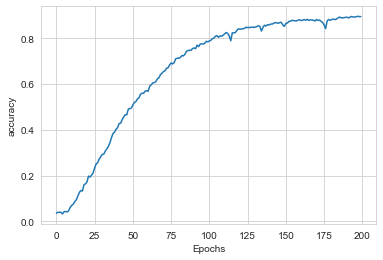

In [37]:
plot_graphs(history,'accuracy')

In [38]:

seed_text = "i m feeling chills"
next_words = 100
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=-1)
    output_word = ""
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' '+output_word
print(seed_text)

i m feeling chills me girl it as dreams you would weave end what used used do do thought thought morning thought heartaches by smile morning baby lifes would hour park park park park park better oh do thought hour bags better tool park park past past eye am just unright morning sun do thought heartaches by smile morning baby do do baby do do baby would been better park tool hollow better better park better better better beg please park park park park brother hour better better better better eye just scars to better to yourself good cool better park park better park
